In [1]:
import os

In [29]:
import pandas as pd
import ast

In [290]:
path_list = [
#     'results_3.csv', 
#              'results_4.csv',
#              'results_5.csv',
#              'results_6.csv',
#              'results_8.csv',
#              'results_9.csv',
    'results_10.csv',
    'results_11.csv',
    'results_tolerance.csv'
            ]

df_list = []
for path in path_list:
    df = pd.read_csv(path)
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

df['rmse_list'] = df['rmse_list'].apply(ast.literal_eval).apply(np.array)
df['final_rmse'] = df['rmse_list'].apply(lambda x: x[-1])
df['iterations'] = df['rmse_list'].apply(lambda x: len(x))

# df = df[df['epsilon'] == 0.0001]

df

,icp_time,method,sampling,epsilon,rmse_list,final_rmse,iterations
0,58.858535,bf,uni,1.000000e-04,"[0.011454535997627274, 0.006191958376872318, 0...",0.011087,15
1,0.099241,kd,uni,1.000000e-04,"[0.011308584095601376, 0.006329491756611007, 0...",0.021238,15
2,12.436267,bf,rand,1.000000e-04,"[0.011495547017579337, 0.006456909410123508, 0...",0.006457,3
3,0.162573,kd,rand,1.000000e-04,"[0.011529005150967346, 0.006081508272988293, 0...",0.012647,15
4,0.011901,bf,multires,1.000000e-04,"[0.03831945333262438, 0.09165913938153596, 0.1...",0.015329,9
...,...,...,...,...,...,...,...
245,68.460158,bf,grad,1.000000e-07,"[0.016666404460996907, 0.010653368559445155, 0...",0.007857,15
246,0.023070,kd,grad,1.000000e-03,"[0.016666404460996907, 0.010653368559445155, 0...",0.007791,4
247,0.075719,kd,grad,1.000000e-05,"[0.016666404460996907, 0.010653368559445155, 0...",0.007857,15
248,0.070455,kd,grad,1.000000e-06,"[0.016666404460996907, 0.010653368559445155, 0...",0.007857,15


In [291]:
df.groupby(['method', 'sampling']).count()

icp_time  epsilon  rmse_list  final_rmse  iterations
method sampling                                                      
bf     all             25       25         25          25          25
       grad            25       25         25          25          25
       multires        25       25         25          25          25
       rand            25       25         25          25          25
       uni             25       25         25          25          25
kd     all             25       25         25          25          25
       grad            25       25         25          25          25
       multires        25       25         25          25          25
       rand            25       25         25          25          25
       uni             25       25         25          25          25

In [246]:
df.groupby(['method', 'sampling'])['icp_time'].agg(['mean', 'std'])

mean          std
method sampling                         
bf     all       587.214159  1119.985781
       grad       61.471125     1.867530
       multires    0.010634     0.005879
       rand       42.858576    28.213068
       uni        63.254588     4.570823
kd     all         0.920235     0.201034
       grad        0.069367     0.004454
       multires    0.013829     0.002812
       rand        0.159060     0.024534
       uni         0.050433     0.036419

In [247]:
df.groupby(['sampling', 'method'])['icp_time'].agg(['mean', 'std'])

mean          std
sampling method                         
all      bf      587.214159  1119.985781
         kd        0.920235     0.201034
grad     bf       61.471125     1.867530
         kd        0.069367     0.004454
multires bf        0.010634     0.005879
         kd        0.013829     0.002812
rand     bf       42.858576    28.213068
         kd        0.159060     0.024534
uni      bf       63.254588     4.570823
         kd        0.050433     0.036419

# ICP time

In [248]:
bf_mean = df[(df['method'] == 'bf')].groupby(
    ['sampling'])['icp_time'].agg('mean')

bf_std = df[(df['method'] == 'bf')].groupby(
    ['sampling'])['icp_time'].agg('std')

kd_mean = df[(df['method'] == 'kd')].groupby(
    ['sampling'])['icp_time'].agg('mean')

kd_std = df[(df['method'] == 'kd')].groupby(
    ['sampling'])['icp_time'].agg('std')

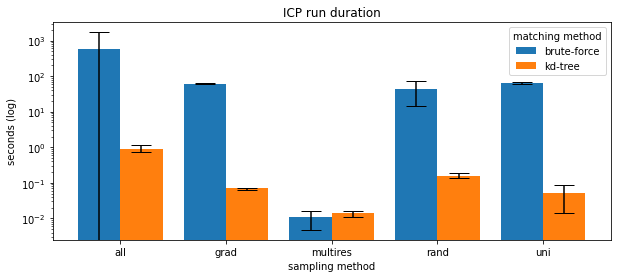

In [249]:
plt.figure(figsize=(10, 4))

X = bf_std.index

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, bf_mean, 0.4, yerr=bf_std, capsize=10, label = 'brute-force')
plt.bar(X_axis + 0.2, kd_mean, 0.4, yerr=kd_std, capsize=10, label = 'kd-tree')
  
plt.xticks(X_axis, X)
plt.xlabel("sampling method")
plt.yscale('log')
plt.ylabel("seconds (log)")
plt.title("ICP run duration")
plt.legend(title='matching method')
plt.show();

In [63]:
bar_df = df.groupby(['method'])['icp_time'].agg(['mean', 'std']).reset_index()
bar_df

,method,mean,std
0,bf,385.476309,683.749507
1,kd,2.549582,6.737948


# RMSE score

In [250]:
bf_mean = df[(df['method'] == 'bf')].groupby(
    ['sampling'])['final_rmse'].agg('mean')

bf_std = df[(df['method'] == 'bf')].groupby(
    ['sampling'])['final_rmse'].agg('std')

kd_mean = df[(df['method'] == 'kd')].groupby(
    ['sampling'])['final_rmse'].agg('mean')

kd_std = df[(df['method'] == 'kd')].groupby(
    ['sampling'])['final_rmse'].agg('std')

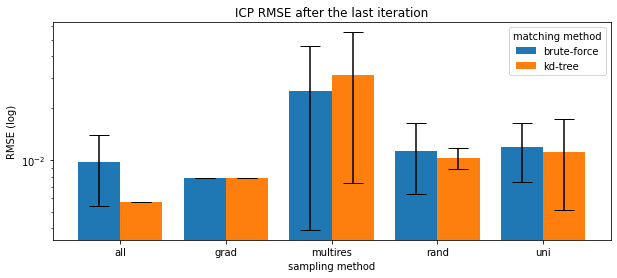

In [251]:
plt.figure(figsize=(10, 4))

X = bf_std.index

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, bf_mean, 0.4, yerr=bf_std, capsize=10, label = 'brute-force')
plt.bar(X_axis + 0.2, kd_mean, 0.4, yerr=kd_std, capsize=10, label = 'kd-tree')
  
plt.xticks(X_axis, X)
plt.xlabel("sampling method")
plt.yscale('log')
plt.ylabel("RMSE (log)")
plt.title("ICP RMSE after the last iteration")
plt.legend(title='matching method')
plt.show()

# Stability

In [266]:
stab_df = df.groupby(['method', 'sampling'])['iterations'].apply(list).to_frame()
stab_df

iterations
method sampling                      
bf     all         [15, 15, 3, 3, 15]
       grad      [15, 15, 15, 15, 15]
       multires      [9, 4, 8, 15, 3]
       rand        [3, 3, 15, 15, 15]
       uni       [15, 15, 15, 15, 15]
kd     all            [3, 3, 3, 3, 3]
       grad      [15, 15, 15, 15, 15]
       multires    [15, 15, 9, 4, 15]
       rand      [15, 15, 15, 15, 15]
       uni         [15, 15, 3, 3, 15]

In [269]:
stab_df['convergence_ratio'] = stab_df['iterations'].apply(lambda x: len([y for y in x if y !=15])/len(x))
stab_df['convergence_ratio']

method  sampling
bf      all         0.4
        grad        0.0
        multires    0.8
        rand        0.4
        uni         0.0
kd      all         1.0
        grad        0.0
        multires    0.4
        rand        0.0
        uni         0.4
Name: convergence_ratio, dtype: float64

In [273]:
bf_conv = stab_df[stab_df.index.get_level_values('method') == 'bf']['convergence_ratio']

kd_conv = stab_df[stab_df.index.get_level_values('method') == 'kd']['convergence_ratio']

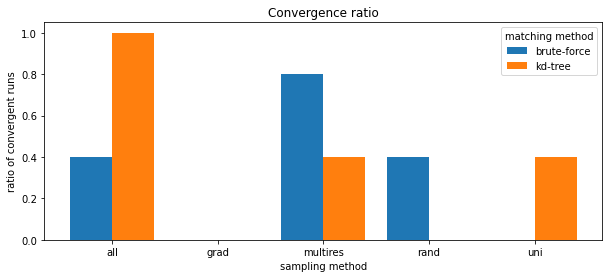

In [276]:
plt.figure(figsize=(10, 4))

X = bf_std.index

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, bf_conv, 0.4, capsize=10, label = 'brute-force')
plt.bar(X_axis + 0.2, kd_conv, 0.4, capsize=10, label = 'kd-tree')
  
plt.xticks(X_axis, X)
plt.xlabel("sampling method")
plt.ylabel("ratio of convergent runs")
plt.title("Convergence ratio")
plt.legend(title='matching method')
plt.show()

# Tolerance

In [304]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [295]:
df.groupby(['epsilon'])['iterations'].value_counts().to_frame('cases of this values').T

epsilon              1.000000e-07                1.000000e-06           \
iterations                     15 4  5  6  11 13           15 7  4  3    
cases of this values           45  1  1  1  1  1           44  3  2  1   

epsilon              1.000000e-05                   1.000000e-04               \
iterations                     15 3  5  14 4  7  8            15  3  4  9  8    
cases of this values           39  4  2  2  1  1  1           33  12  2  2  1   

epsilon              1.000000e-03            
iterations                     3   4  15 5   
cases of this values           31  11  6  2

In [301]:
df['converged'] = df['iterations'].apply(lambda x: x<15)

In [308]:
df.groupby(['method', 'sampling', 'epsilon'])['converged'].value_counts().to_frame('cases of this values')

cases of this values
method sampling epsilon      converged                      
bf     all      1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         3
                             True                          2
                1.000000e-03 True                          5
       grad     1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         5
                1.000000e-03 True                          5
       multires 1.000000e-07 True                          4
                             False                         1
                1.000000e-06 True                          3
                             False                         2
                1.000000e-05 True                          3
                             False                         2
                1.000000e-04 True                          4
                             False                         1
                1.000000e-03 True                          3
                             False                         2
       rand     1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         3
                             True                          2
                1.000000e-03 True                          5
       uni      1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         5
                1.000000e-03 True                          5
kd     all      1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 True                          3
                             False                         2
                1.000000e-04 True                          5
                1.000000e-03 True                          5
       grad     1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         5
                1.000000e-03 True                          5
       multires 1.000000e-07 False                         4
                             True                          1
                1.000000e-06 True                          3
                             False                         2
                1.000000e-05 True                          5
                1.000000e-04 False                         3
                             True                          2
                1.000000e-03 False                         4
                             True                          1
       rand     1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         5
                1.000000e-03 True                          5
       uni      1.000000e-07 False                         5
                1.000000e-06 False                         5
                1.000000e-05 False                         5
                1.000000e-04 False                         3
                             True                          2
                1.000000e-03 True                          5

In [58]:
import numpy as np
arr = df[(df['method'] == 'bf') & (df['sampling'] == 'uni')]['rmse_list'].values
arr

array([0.00639587, 0.00880057, 0.00463679])

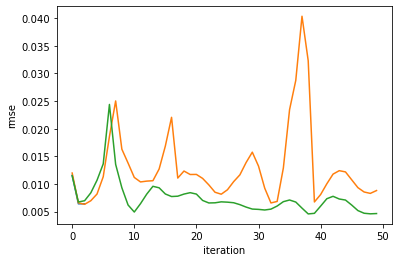

In [55]:
import matplotlib.pyplot as plt
plt.plot(arr[0])
plt.plot(arr[1])
plt.plot(arr[2]);
plt.xlabel("iteration")
plt.ylabel("rmse");

In [ ]:
mean_signal = responsive_vertex_FIR_timecourses.mean(axis=0)
std_signal = responsive_vertex_FIR_timecourses.std(axis=0) #for every single timepoint

tq = stats.t(df=voxels_num - 1).ppf(percentile) # lets do it super exactly ;)
error = tq * (std_signal/np.sqrt(voxels_num))

plt.plot(mean_signal, **plot_kwargs)

if 'color' in plot_kwargs:
    dark_color = adjust_lightness(plot_kwargs['color'], 0.9)
else:
    dark_color = 'grey'

x = np.arange(0, trs_num)
plt.fill_between(x, (mean_signal-error), (mean_signal+error),
                 color=dark_color, alpha=0.3)